In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
import squidpy as sq
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [3]:
#sq.pl.spatial_scatter(anndata,color=annotation1,shape=None, figsize=(10, 10)) 

In [4]:
annotation1 = 'annotation_own_score_genes_BasicMartin_12'
annotation2 = 'annotation_score_genes_original_BasicMartin_12'

In [5]:
anno1_co_ocs = []
anno2_co_ocs = []
diff_co_ocs = []

A1-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
A1-2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
C2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
D2-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Meso']
PS


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']


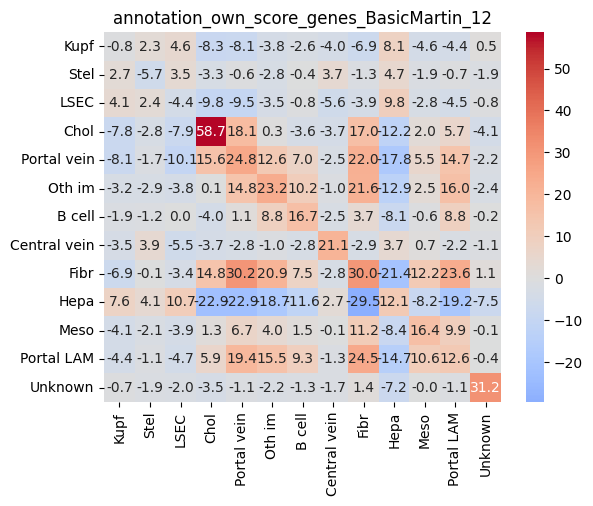

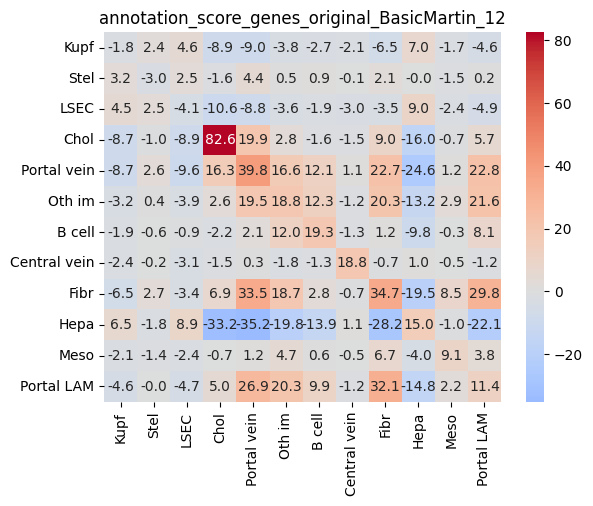

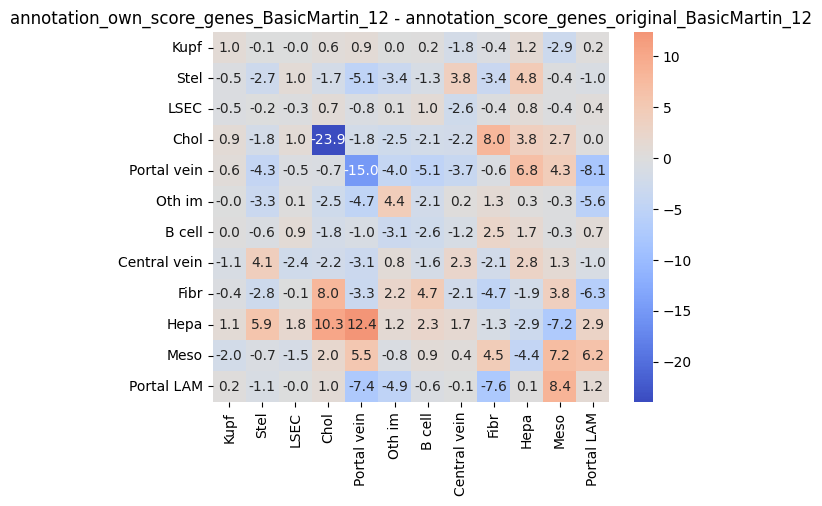

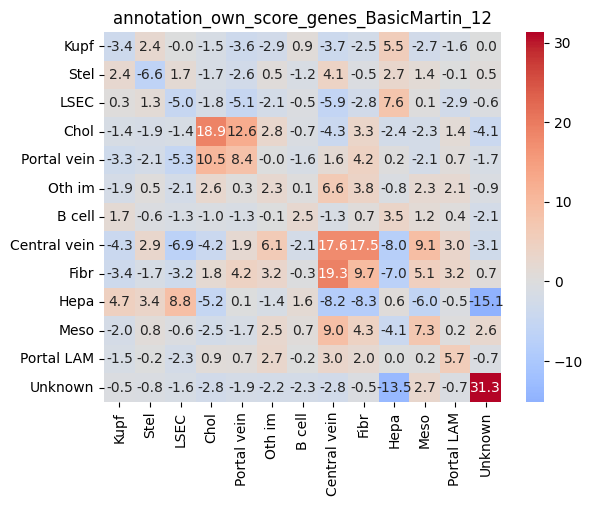

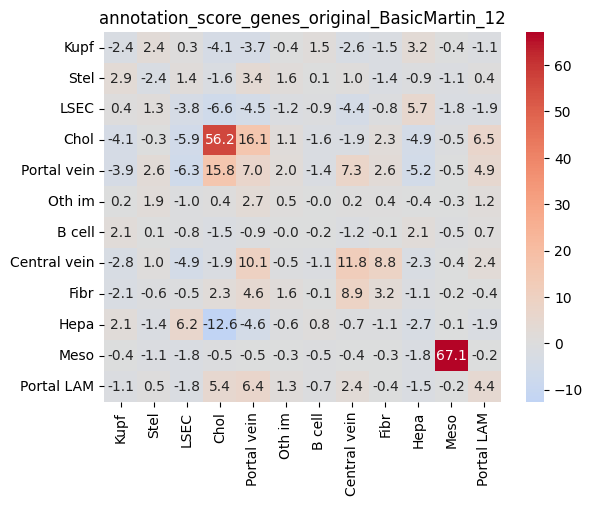

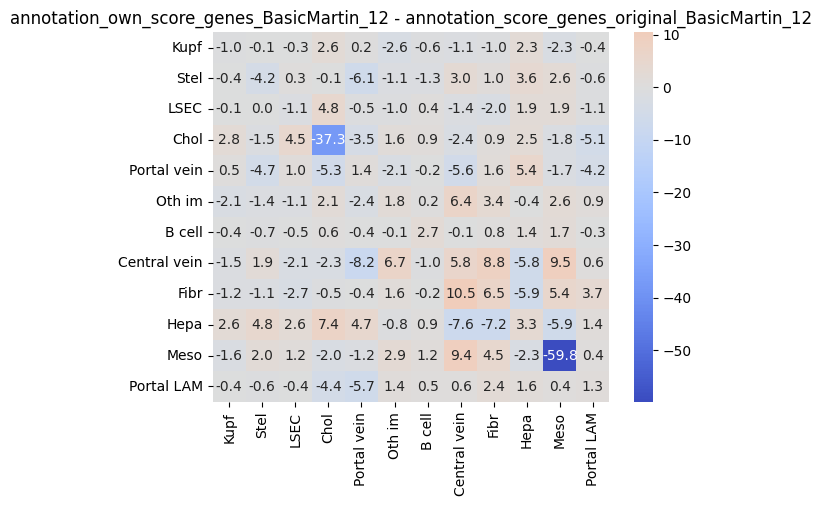

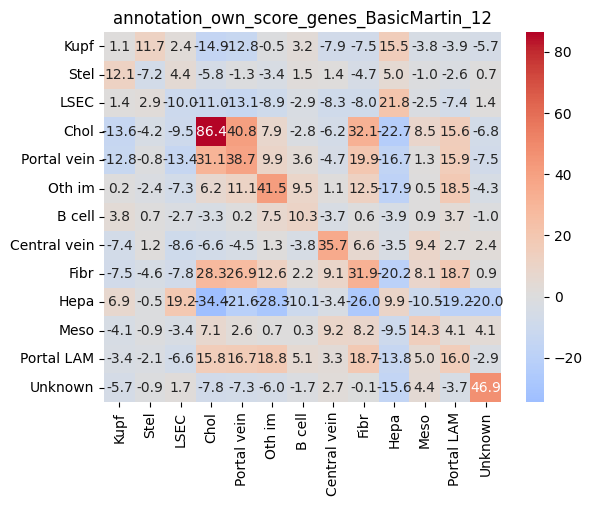

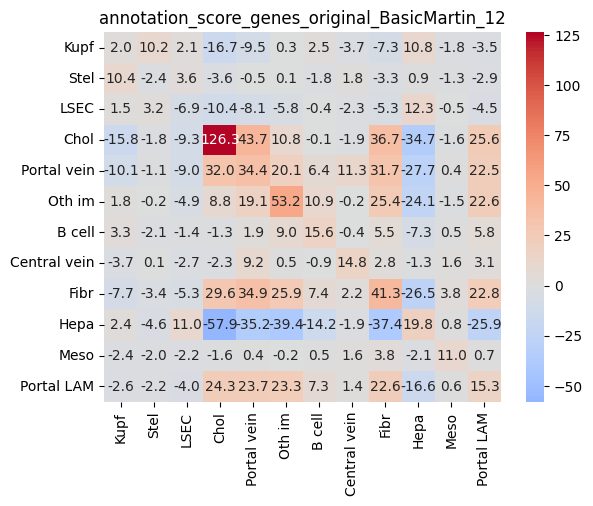

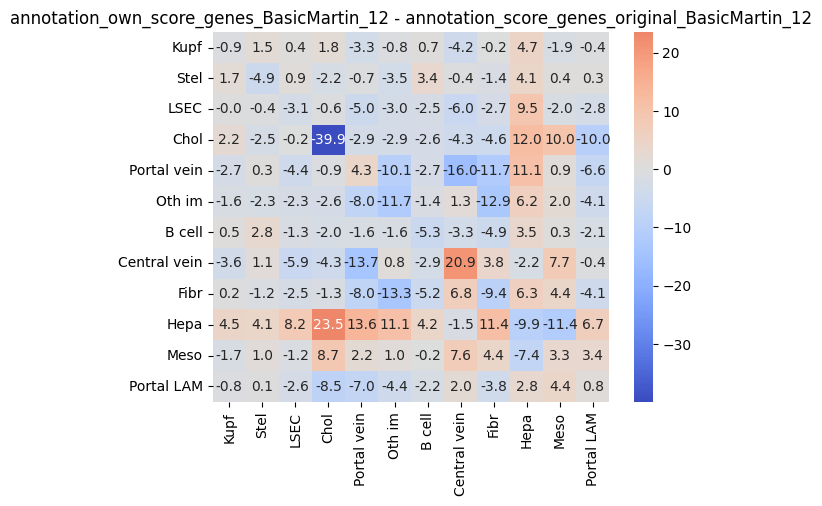

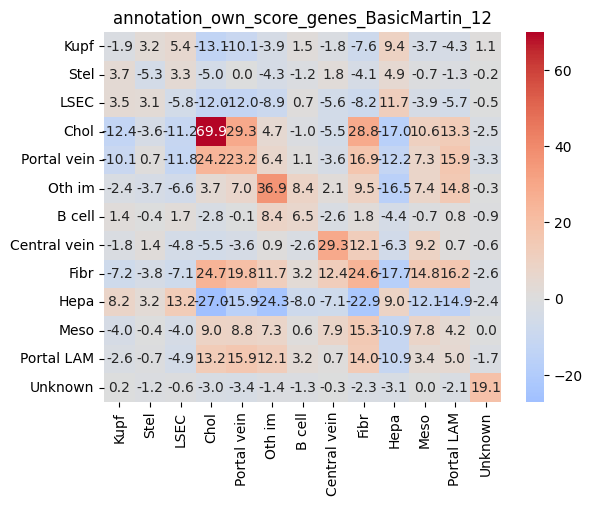

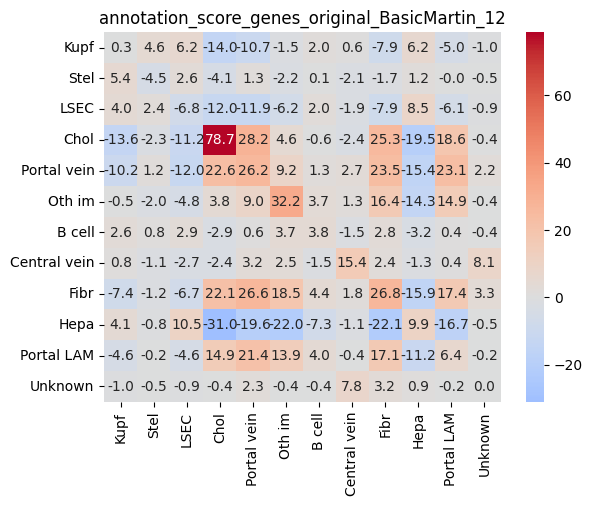

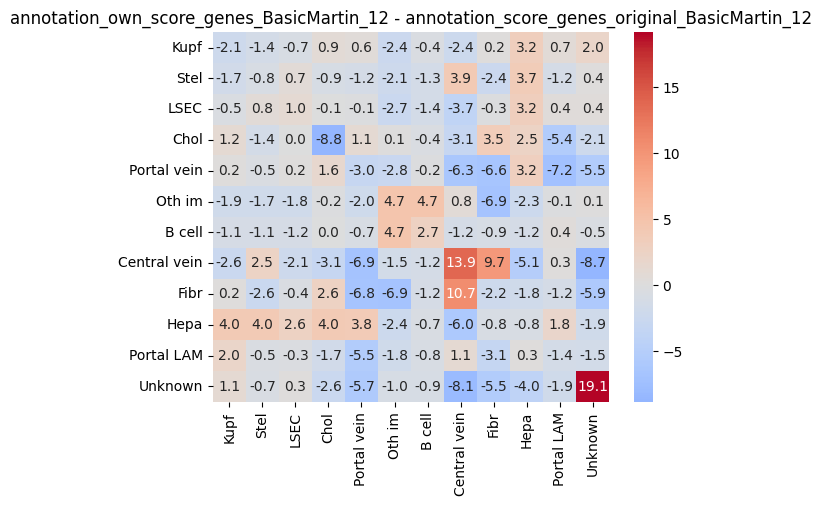

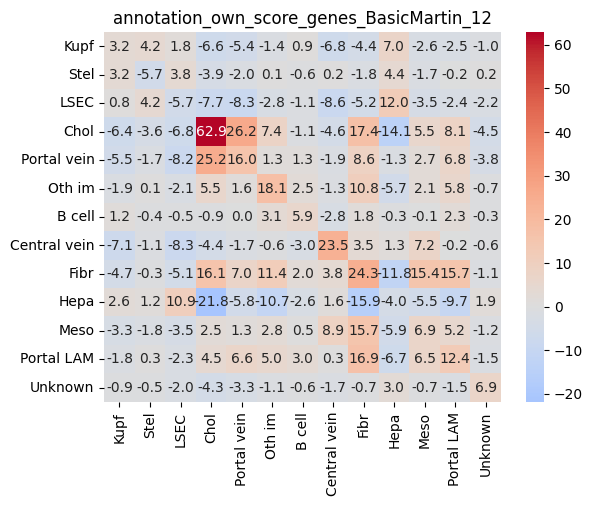

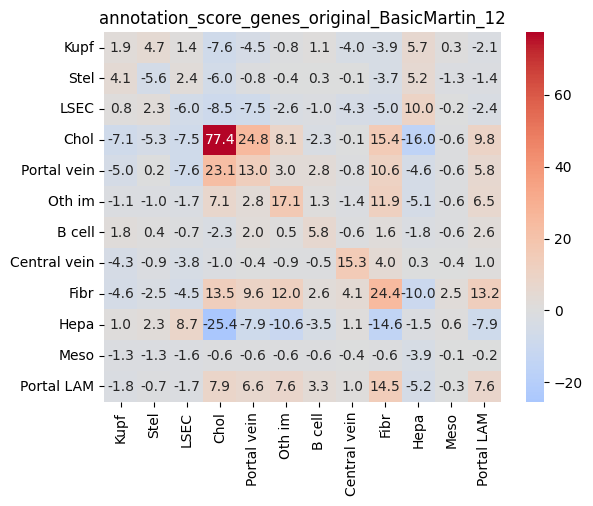

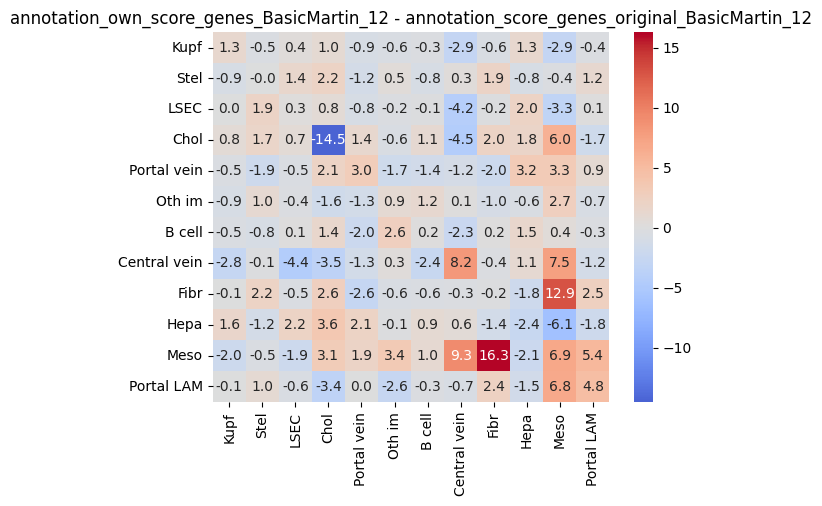

In [6]:
for i in range(len(anndata_objects)):
    print(samples[i])
    anno1_co_oc,anno2_co_oc,diff_co_oc = compare_co_occurrence(anndata_objects[i], annotation1, annotation2)
    anno1_co_ocs.append(anno1_co_oc)
    anno2_co_ocs.append(anno2_co_oc)
    diff_co_ocs.append(diff_co_oc)

[                  Kupf      Stel       LSEC       Chol  Portal vein  \
 Kupf         -0.786196  2.319133   4.567571  -8.328499    -8.077916   
 Stel          2.650261 -5.667409   3.506709  -3.292606    -0.642075   
 LSEC          4.070396  2.387782  -4.444727  -9.821458    -9.517706   
 Chol         -7.781955 -2.808067  -7.943211  58.673851    18.085251   
 Portal vein  -8.053288 -1.686572 -10.076254  15.587773    24.818754   
 Oth im       -3.239190 -2.902577  -3.820020   0.118035    14.777981   
 B cell       -1.853363 -1.181545   0.010819  -3.998581     1.069353   
 Central vein -3.490963  3.934875  -5.500415  -3.688444    -2.775830   
 Fibr         -6.947013 -0.112719  -3.430525  14.813455    30.176989   
 Hepa          7.566286  4.054527  10.687301 -22.905373   -22.858455   
 Meso         -4.090191 -2.137365  -3.904521   1.295348     6.730022   
 Portal LAM   -4.388914 -1.094005  -4.731996   5.924923    19.448506   
 Unknown      -0.720804 -1.901455  -2.030461  -3.450108    -1.11